In [1]:
import pandas as pd 
import numpy as np 


In [2]:
df = pd.read_csv('german.csv')
df.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


## Analyse Exploratoire des données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A11     999 non-null    object
 1   6       999 non-null    int64 
 2   A34     999 non-null    object
 3   A43     999 non-null    object
 4   1169    999 non-null    int64 
 5   A65     999 non-null    object
 6   A75     999 non-null    object
 7   4       999 non-null    int64 
 8   A93     999 non-null    object
 9   A101    999 non-null    object
 10  4.1     999 non-null    int64 
 11  A121    999 non-null    object
 12  67      999 non-null    int64 
 13  A143    999 non-null    object
 14  A152    999 non-null    object
 15  2       999 non-null    int64 
 16  A173    999 non-null    object
 17  1       999 non-null    int64 
 18  A192    999 non-null    object
 19  A201    999 non-null    object
 20  1.1     999 non-null    int64 
dtypes: int64(8), object(13)
memory usage: 164.0+ KB


In [4]:
df.describe()

,6,1169,4,4.1,67,2,1,1.1
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,20.917918,3273.362362,2.971972,2.843844,35.514515,1.406406,1.155155,1.300300
std,12.055619,2823.365811,1.118802,1.103665,11.337487,0.577639,0.362234,0.458618
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1368.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2320.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [5]:
df.isnull().sum()

A11     0
6       0
A34     0
A43     0
1169    0
A65     0
A75     0
4       0
A93     0
A101    0
4.1     0
A121    0
67      0
A143    0
A152    0
2       0
A173    0
1       0
A192    0
A201    0
1.1     0
dtype: int64

Aucune valeur manquante

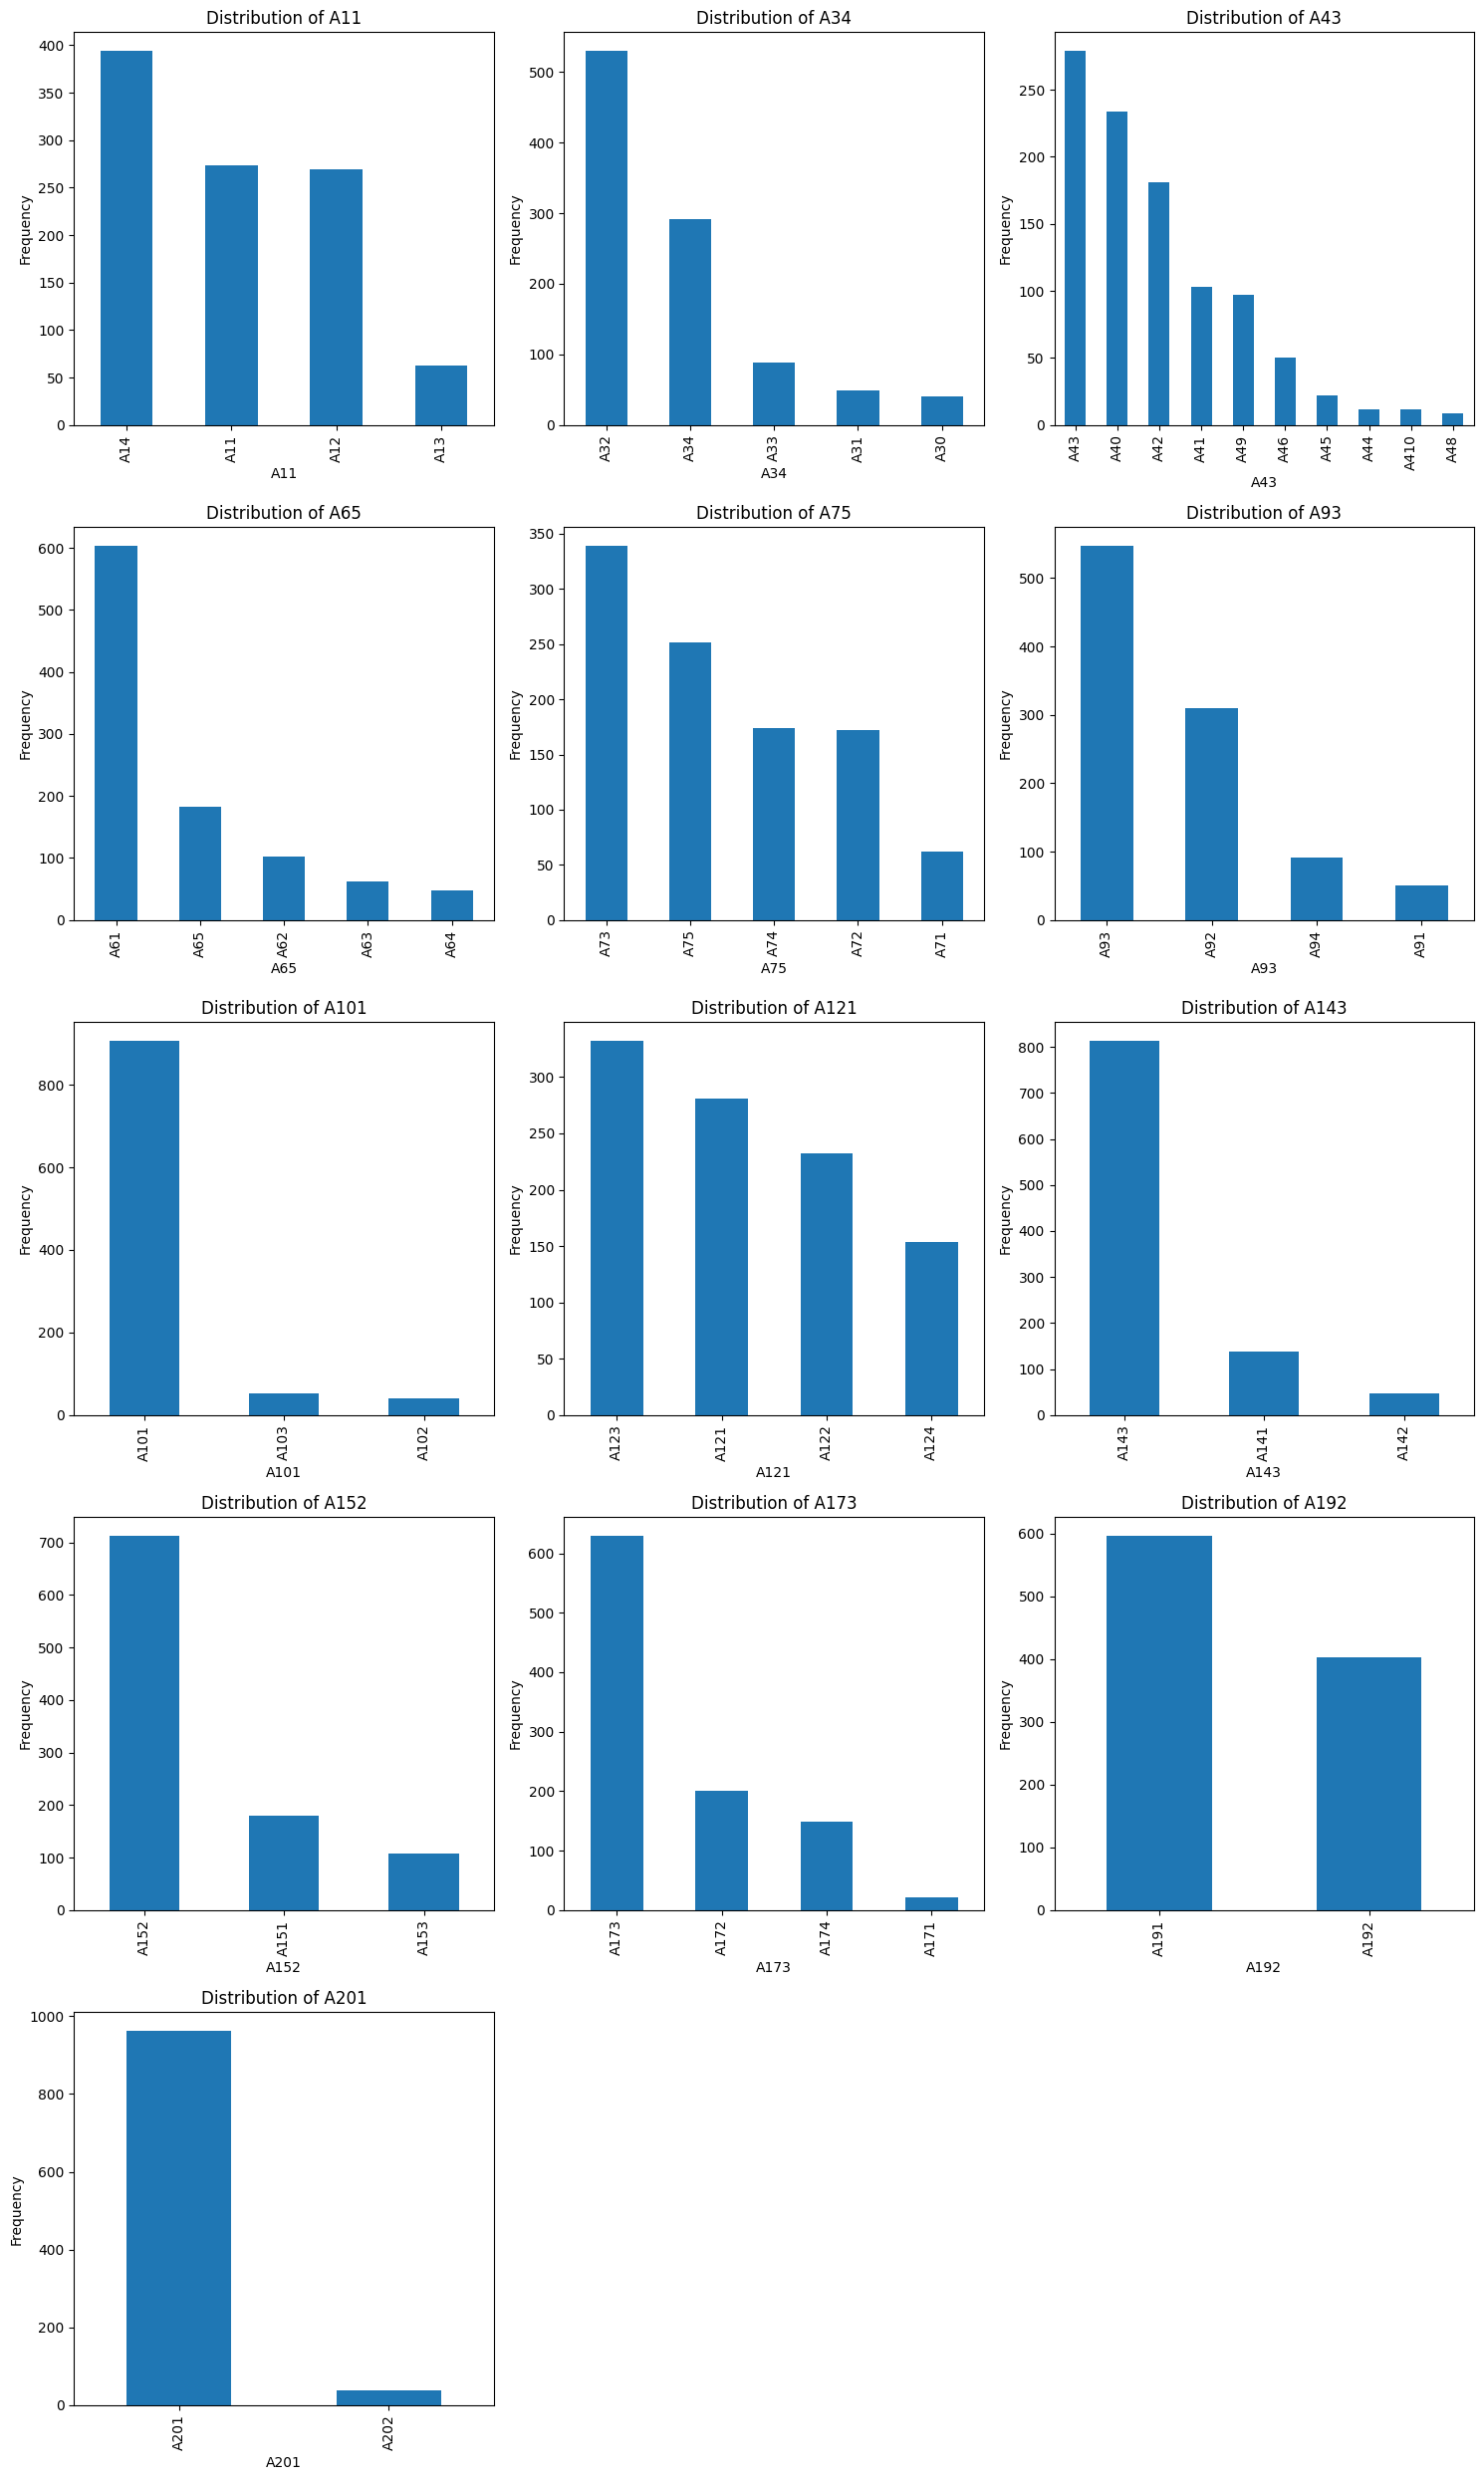

In [6]:
import matplotlib.pyplot as plt
import math

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Define the number of columns for the grid layout
num_cols = 3
num_plots = len(categorical_columns)
num_rows = math.ceil(num_plots / num_cols)

# Create a grid layout for the plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot bar charts for each categorical column
for i, column in enumerate(categorical_columns):
    df[column].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of categorical columns is not a multiple of num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


## Interpretation of Categorical Distributions

### 1. Dominant Categories
   - Many columns (e.g., `A11`, `A34`, `A101`) have one dominant category.
   - **Insight**: This imbalance may bias the model toward frequent categories.
   - **Suggestion**: Use balancing techniques (e.g., oversampling/undersampling) or algorithms that handle imbalance, like Random Forest.

### 2. Extreme Imbalance (e.g., `A101`, `A152`, `A201`)
   - These columns show extreme imbalances (one category >80%).
   - **Insight**: Such features may add little value or bias the model.
   - **Suggestion**: Assess these features' importance. Drop or encode them differently if they add little predictive power.

### 3. Moderate Variation (e.g., `A75`, `A121`, `A192`)
   - These columns show more balance across categories.
   - **Insight**: Likely more informative for the model.
   - **Suggestion**: Retain and use appropriate encoding (e.g., one-hot encoding).

### 4. Multimodality in `A173`
   - Multiple peaks suggest distinct subgroups in `A173`.
   - **Insight**: Could indicate underlying clusters valuable for prediction.
   - **Suggestion**: Explore its interaction with other features and its relation to the target variable.

## Recommendations
- **Balance Data**: Apply balancing methods for dominant categories.
- **Feature Selection**: Drop or transform highly imbalanced features with low predictive power.
- **Effective Encoding**: Use one-hot encoding for moderately balanced features.
- **Explore Interactions**: Investigate multimodal features for additional insights.


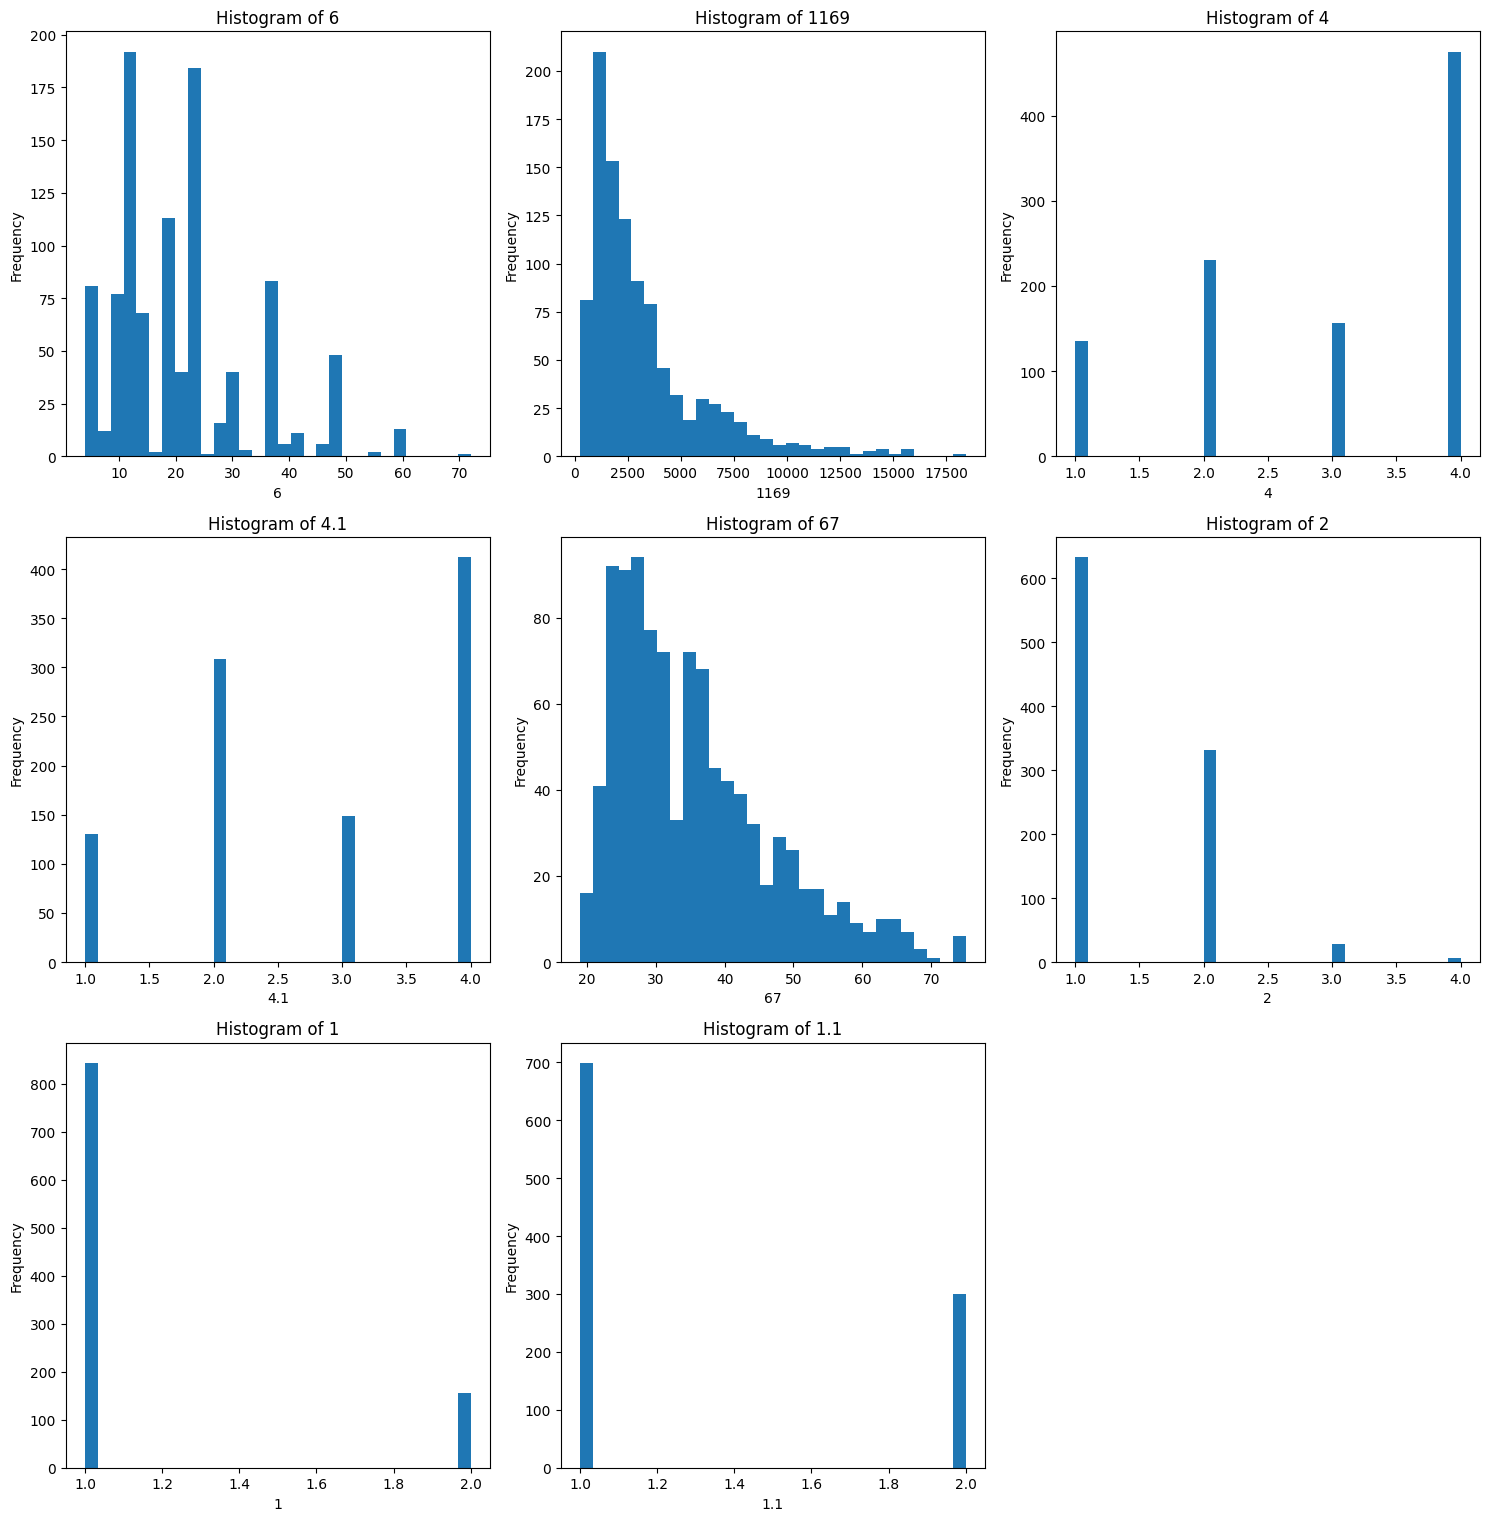

In [7]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Create a grid layout for the plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot histograms for each numerical column
for i, column in enumerate(numerical_columns):
    df[column].plot(kind='hist', bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of numerical columns is not a multiple of num_cols
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Interpretation of Numerical Distributions

### 1. Right-Skewed Distributions (`1169`, `67`)
   - **Insight**: These columns have most values on the left with a long tail on the right.
   - **Suggestion**: Apply a log transformation to reduce skewness, which can improve model performance.

### 2. Bimodal and Multimodal Distributions (`6`, `4.1`, `2`)
   - **Insight**: Multiple peaks indicate possible subgroups within these features.
   - **Suggestion**: Explore interactions with other features or clustering to identify distinct groups.

### 3. Binary and Low-Variance Columns (`1`, `1.1`, `4`)
   - **Insight**: These columns have few unique values, indicating categorical or binary-like behavior.
   - **Suggestion**: Consider encoding as categorical features and assess their importance in the model.

## Recommendations
- **Transform Skewed Data**: Use log transformations for heavily skewed features.
- **Identify Subgroups**: Analyze multimodal features for potential clusters or segments.
- **Categorical Encoding**: Treat low-variance features as categorical or binary.


## Why Column `1` is Likely the Target Variable

### 1. Distribution and Balance
   - Column `1` has two distinct values (1 and 2) with an imbalanced distribution (e.g., majority class has 844 instances, minority class has 155). This aligns with typical target variable characteristics in classification problems, where one class (e.g., "good" credit) is more common than the other (e.g., "bad" credit).

### 2. Column `1.1` Has a Different Distribution Pattern
   - Although `1.1` also has two unique values, its distribution is more balanced (e.g., 699 vs. 300). In many credit scoring datasets, the target variable often shows a more skewed distribution due to a higher number of "good" vs. "bad" cases.

### 3. Naming Convention
   - Columns with decimal names (like `1.1`) are often derived or auxiliary features rather than primary classification targets. The name `1` could imply a primary attribute, aligning with a target variable’s role.

### Conclusion
   - Based on distribution, naming, and typical dataset patterns, column `1` is likely the target variable, while column `1.1` is more likely a feature.


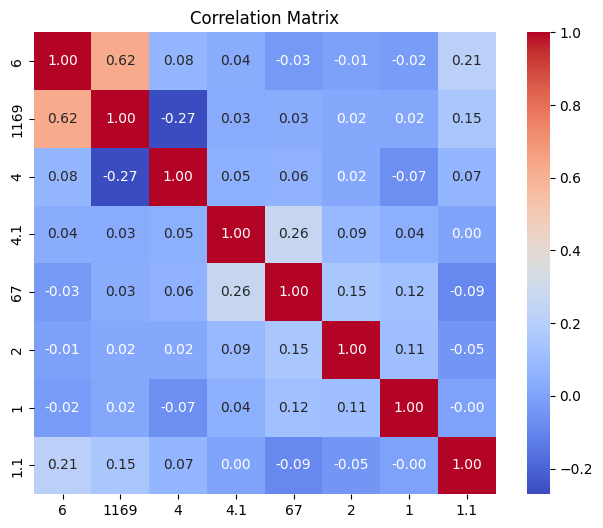

In [8]:
import seaborn as sns

# Select only the numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Generate a correlation matrix for the numerical columns
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()


## Preprocessing Steps: Removing Columns, Log Transformation, and Balancing
### 1. Removing Columns
   - **Columns to Remove**: `A101`, `A152`, `A201`, `1.1`, and possibly `6` or `1169`.
   - **Reasoning**:
     - **Imbalanced Categorical Columns** (`A101`, `A152`, `A201`): These columns have a dominant category that constitutes over 80% of their values, which provides minimal informational value and can add noise to the model. Removing them simplifies the dataset without sacrificing much predictive power.
     - **Low Variance Column** (`1.1`): This column has only two unique values and shows little variance. If it does not strongly correlate with the target, it can be safely removed as it likely adds limited value.
     - **Redundant Columns** (`6` and `1169`): These columns show a high correlation, suggesting they contain overlapping information. Retaining both could lead to multicollinearity, potentially confusing the model. Keeping only one (e.g., `1169`) or creating a combined feature can reduce redundancy and improve clarity.

### 2. Log Transformation
   - **Columns to Transform**: `1169` and `67`.
   - **Reasoning**:
     - **Right-Skewed Distributions**: Both columns are right-skewed, meaning that most of their values are concentrated on one side with a long tail. Applying a log transformation reduces skewness, making the distribution more symmetrical, which is beneficial for many machine learning algorithms that perform better with normally distributed data.

### 3. Balancing the Target Variable
   - **Method**: Apply oversampling (such as SMOTE) to balance the target variable `1`.
   - **Reasoning**:
     - **Imbalanced Target**: The target variable is imbalanced, with one class being significantly more prevalent than the other. This can lead to biased predictions favoring the majority class. Using a balancing technique like SMOTE creates synthetic examples of the minority class, achieving a balanced target distribution without simple duplication.

### Summary
- **Removing Columns**: Streamlines the dataset by discarding features with low variance, extreme imbalance, or redundancy, reducing noise.
- **Log Transformation**: Adjusts skewed numerical columns (`1169`, `67`) to a more normal-like distribution, improving suitability for modeling.
- **Balancing the Target**: Ensures equal representation of target classes, reducing bias and enhancing model performance.

This preprocessing strategy prepares the dataset for effective model training by addressing redundancy, skewness, and class imbalance.


In [9]:
# Remove specified columns from the dataframe
columns_to_remove = ['A101', 'A152', 'A201', '1.1', '6']
df = df.drop(columns=columns_to_remove)

# Verify the columns have been removed
df.head()

,A11,A34,A43,1169,A65,A75,4,A93,4.1,A121,67,A143,2,A173,1,A192
0,A12,A32,A43,5951,A61,A73,2,A92,2,A121,22,A143,1,A173,1,A191
1,A14,A34,A46,2096,A61,A74,2,A93,3,A121,49,A143,1,A172,2,A191
2,A11,A32,A42,7882,A61,A74,2,A93,4,A122,45,A143,1,A173,2,A191
3,A11,A33,A40,4870,A61,A73,3,A93,4,A124,53,A143,2,A173,2,A191
4,A14,A32,A46,9055,A65,A73,2,A93,4,A124,35,A143,1,A172,2,A192


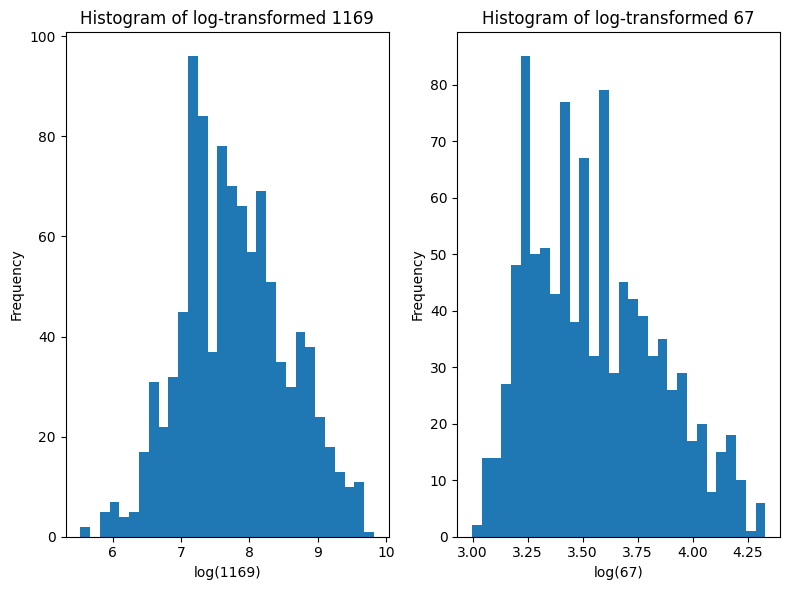

In [10]:
# Apply log transformation to the specified columns
df['1169'] = np.log1p(df['1169'])  # log1p is used to handle zero values
df['67'] = np.log1p(df['67'])

# Plot histograms for the log-transformed columns
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

df['1169'].plot(kind='hist', bins=30, ax=axes[0])
axes[0].set_title('Histogram of log-transformed 1169')
axes[0].set_xlabel('log(1169)')
axes[0].set_ylabel('Frequency')

df['67'].plot(kind='hist', bins=30, ax=axes[1])
axes[1].set_title('Histogram of log-transformed 67')
axes[1].set_xlabel('log(67)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Log Transformation Results

- The log transformation has successfully reduced skewness in columns `1169` and `67`, making their distributions closer to normal.
- Using `np.log1p` was effective for handling zero values, as it shifts values up by 1 before taking the log, avoiding issues with undefined values.
- These transformed features are now more suitable for modeling, especially for algorithms that perform better with normally distributed data.


In [11]:
# Encoding only the remaining categorical columns
df = pd.get_dummies(df, columns=['A34', 'A75', 'A93', 'A121', 'A192', 'A11', 'A43', 'A65', 'A143', 'A173'], drop_first=True)

# 2. Separate the target variable
X = df.drop('1', axis=1)  # Features
y = df['1']               # Target


In [12]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the target variable
X_resampled, y_resampled = smote.fit_resample(X, y)

1. **Encoding Categorical Variables**:
   - Used **one-hot encoding** on the categorical columns to convert them into numerical form. This step ensures compatibility with machine learning algorithms and SMOTE, which require numeric data.
   - Columns encoded include: `A34`, `A75`, `A93`, `A121`, `A192`, `A11`, `A43`, `A65`, `A143`, `A173`.
   - One-hot encoding with `drop_first=True` avoids multicollinearity by dropping the first category in each column, reducing redundancy in the feature set.

2. **Separating Features and Target**:
   - Defined `X` as the feature set by removing the target column (`'1'`) from the DataFrame.
   - Defined `y` as the target variable, which we aim to predict.

3. **Balancing the Target Variable with SMOTE**:
   - Applied **SMOTE (Synthetic Minority Over-sampling Technique)** to address class imbalance in the target variable.
   - SMOTE generates synthetic samples for the minority class in `y`, creating a balanced dataset for training and reducing model bias.
   - Result: `X_resampled` and `y_resampled` contain the balanced dataset, ready for training.

This preprocessing workflow ensures that all features are numeric, the target variable is balanced, and the dataset is prepared for modeling.


In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Initialize the scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Step 3: Apply Standard Scaling
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Step 4: Apply Min-Max Scaling
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)


### Preparing Data with Multiple Scaling Methods

Since different machine learning models may benefit from different types of scaling, we can prepare multiple versions of our scaled data to ensure optimal model performance. Here’s how we approach it:

#### 1. Standardization (StandardScaler)
   - **Description**: Standardization scales the data to have a mean of 0 and a standard deviation of 1.
   - **Best For**: Models like **linear models (e.g., logistic regression)**, **support vector machines (SVMs)**, and **neural networks**, which assume normally distributed data or use gradient-based optimization.

#### 2. Normalization (MinMaxScaler)
   - **Description**: Normalization scales each feature to a fixed range, typically between 0 and 1.
   - **Best For**: **Distance-based models** (e.g., **K-nearest neighbors**, **K-means clustering**) or when features have widely different ranges that need bounding.

By scaling from the start, we set up the data to be model-ready, ensuring each feature contributes proportionately and improving model stability and performance.


In [14]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model_lr = LogisticRegression()

# Stratified k-fold for feature selection
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RFE
rfe = RFE(model_lr, n_features_to_select=10)

# Fit RFE on standardized training data with cross-validation
X_train_standard_reduced = rfe.fit_transform(X_train_standard, y_train)
X_test_standard_reduced = rfe.transform(X_test_standard)

# Apply RFE to Min-Max scaled data
X_train_minmax_reduced = rfe.transform(X_train_minmax)
X_test_minmax_reduced = rfe.transform(X_test_minmax)

# Display selected features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)


Selected features: Index(['A34_A32', 'A34_A34', 'A75_A72', 'A75_A73', 'A75_A74', 'A75_A75',
       'A93_A93', 'A173_A172', 'A173_A173', 'A173_A174'],
      dtype='object')


### Explanation of Feature Selection with Recursive Feature Elimination (RFE) and Cross-Validation

The code above uses **Recursive Feature Elimination (RFE)** with Logistic Regression to select the top 10 most relevant features from the dataset, incorporating cross-validation for robustness. Here’s a breakdown of each step and what the results mean.

#### Code Breakdown
1. **Initialize Logistic Regression Model**:
   - We create a logistic regression model (`model_lr`) to act as the base estimator for RFE. Logistic regression is chosen because of its simplicity and ability to rank features by importance.

2. **Use Stratified K-Fold Cross-Validation**:
   - `StratifiedKFold(n_splits=5, shuffle=True, random_state=42)` is used to ensure balanced class distribution across the folds during feature selection. This enhances the robustness of feature selection by validating it across multiple subsets of the data.

3. **Apply RFE with Logistic Regression**:
   - `RFE(model_lr, n_features_to_select=10)` initializes Recursive Feature Elimination to select the 10 most important features based on the logistic regression model's coefficients.
   - The feature elimination is applied to the **standardized training data** using `rfe.fit_transform(X_train_standard, y_train)`. This method ranks features, recursively removing the least important ones until only the top 10 features remain.
   - `rfe.transform(X_test_standard)` applies the same feature selection criteria to the standardized test set, ensuring consistency between training and testing datasets.

4. **Apply RFE to Min-Max Scaled Data**:
   - To ensure consistency across different scaling methods, the same RFE model is applied to the min-max scaled data. This is achieved using:
     - `rfe.transform(X_train_minmax)` for the training data.
     - `rfe.transform(X_test_minmax)` for the test data.

5. **Retrieve Selected Features**:
   - `X_train.columns[rfe.support_]` retrieves the names of the 10 selected features based on the original feature names. This output identifies the most relevant features for prediction according to the logistic regression model.

#### Purpose of Feature Selection
Using RFE to identify the most important features serves several purposes:
   - **Dimensionality Reduction**: Reduces the number of features, leading to faster training and testing.
   - **Noise Reduction**: Removes irrelevant or redundant features, potentially improving model accuracy and generalization.
   - **Interpretability**: Highlights the most critical features, aiding in better understanding of the model’s decision-making process.



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Dictionary to store models for Standard Scaled Data
models_standard = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Random Forest (Standard)": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB() 
}

# Dictionary to store models for Min-Max Scaled Data
models_minmax = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest (Min-Max)": RandomForestClassifier(),
}

# Define hyperparameter grids for Standard Scaled Data
param_grids_standard = {
    "Logistic Regression": {"C": [0.1, 1, 10], "penalty": ["l2"]},
    "Support Vector Machine": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"], "gamma": [0.01, 0.1, 1]},
    "Random Forest (Standard)": {"n_estimators": [100, 200, 500], "max_depth": [None, 10, 20], "min_samples_split": [2, 5]},
    "Decision Tree": {"max_depth": [None, 10, 20], "min_samples_split": [2, 5, 10]},
    "Naive Bayes": {}  
}

# Define hyperparameter grids for Min-Max Scaled Data
param_grids_minmax = {
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
    "Random Forest (Min-Max)": {"n_estimators": [100, 200, 500], "max_depth": [None, 10, 20], "min_samples_split": [2, 5]},
}

# Initialize dictionaries to store the best models
trained_models_standard = {}
trained_models_minmax = {}

# Train and tune models on Standard Scaled Data
print("Training and tuning models on Standard Scaled data...")
for name, model in models_standard.items():
    if param_grids_standard.get(name, {}):  # Check if the model has hyperparameters to tune
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids_standard.get(name, {}),
            scoring="accuracy",
            cv=5,  # 5-fold cross-validation
            verbose=2,
            n_jobs=-1  # Use all available processors
        )
        grid_search.fit(X_train_standard_reduced, y_train)
        trained_models_standard[name] = grid_search.best_estimator_  # Save the best model
        print(f"{name} tuned with best parameters: {grid_search.best_params_}")
    else:
        # Directly fit models without hyperparameters (e.g., Naive Bayes)
        model.fit(X_train_standard_reduced, y_train)
        trained_models_standard[name] = model
        print(f"{name} trained without hyperparameter tuning.")

# Train and tune models on Min-Max Scaled Data
print("\nTraining and tuning models on Min-Max Scaled data...")
for name, model in models_minmax.items():
    if param_grids_minmax.get(name, {}):  # Check if the model has hyperparameters to tune
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids_minmax.get(name, {}),
            scoring="accuracy",
            cv=5,  # 5-fold cross-validation
            verbose=2,
            n_jobs=-1  # Use all available processors
        )
        grid_search.fit(X_train_minmax_reduced, y_train)
        trained_models_minmax[name] = grid_search.best_estimator_  # Save the best model
        print(f"{name} tuned with best parameters: {grid_search.best_params_}")
    else:
        # Directly fit models without hyperparameters (e.g., Naive Bayes)
        model.fit(X_train_minmax_reduced, y_train)
        trained_models_minmax[name] = model
        print(f"{name} trained without hyperparameter tuning.")


Training and tuning models on Standard Scaled data...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Logistic Regression tuned with best parameters: {'C': 10, 'penalty': 'l2'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Support Vector Machine tuned with best parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest (Standard) tuned with best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Decision Tree tuned with best parameters: {'max_depth': None, 'min_samples_split': 2}
Naive Bayes trained without hyperparameter tuning.

Training and tuning models on Min-Max Scaled data...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
K-Nearest Neighbors tuned with best parameters: {'n_neighbors': 7, 'weights': 'distance'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random Forest (M

### Hyperparameter Tuning for Machine Learning Models with GridSearchCV

The code above performs **hyperparameter tuning** for multiple machine learning models using **GridSearchCV**. It optimizes model parameters through an exhaustive search over specified hyperparameter grids for both **Standard Scaled Data** and **Min-Max Scaled Data**. Below is an explanation of the process and an interpretation of the output results.

---

#### Code Breakdown

1. **Model Initialization**:
   - Two separate dictionaries (`models_standard` and `models_minmax`) define the models to be tuned for the **Standard Scaled Data** and **Min-Max Scaled Data** respectively.
   - Models include:
     - **Standard Scaled Data**:
       - Logistic Regression
       - Support Vector Machine (SVM)
       - Random Forest Classifier
       - Decision Tree Classifier
       - Naive Bayes
     - **Min-Max Scaled Data**:
       - K-Nearest Neighbors (KNN)
       - Random Forest Classifier

2. **Define Hyperparameter Grids**:
   - Each model is paired with a grid of hyperparameters to be optimized:
     - **Logistic Regression**: Regularization strength (`C`) and penalty type (`penalty`).
     - **Support Vector Machine (SVM)**: Regularization strength (`C`), kernel type (`kernel`), and kernel coefficient (`gamma`).
     - **Random Forest**: Number of estimators (`n_estimators`), maximum tree depth (`max_depth`), and minimum samples to split (`min_samples_split`).
     - **Decision Tree**: Maximum tree depth (`max_depth`) and minimum samples to split (`min_samples_split`).
     - **K-Nearest Neighbors**: Number of neighbors (`n_neighbors`) and weight type (`weights`).
     - **Naive Bayes**: No hyperparameters are tuned as it does not require them.

3. **Hyperparameter Tuning with GridSearchCV**:
   - **GridSearchCV** performs an exhaustive search across the hyperparameter grid for each model:
     - `cv=5`: 5-fold cross-validation ensures that the model is validated on different subsets of the data.
     - `scoring="accuracy"`: Accuracy is used as the metric to select the best hyperparameters.
     - `n_jobs=-1`: All available CPU cores are used to speed up the process.

4. **Save Best Models**:
   - For each model, the best estimator (model with optimal hyperparameters) is stored in `trained_models_standard` or `trained_models_minmax` for later evaluation.
   - **Naive Bayes** is trained directly without hyperparameter tuning and added to the dictionary.

5. **Output Best Parameters**:
   - The best hyperparameters for each model are printed, providing insight into the parameter values that maximize accuracy.

---

#### Interpretation of the Output

1. **Standard Scaled Data**:
   - **Logistic Regression**:
     - Best parameters: `{'C': 10, 'penalty': 'l2'}`
     - A higher regularization strength (`C=10`) was chosen, and the `l2` penalty was applied, indicating that all features were penalized equally for better model generalization.
   - **Support Vector Machine (SVM)**:
     - Best parameters: `{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}`
     - A high regularization strength (`C=10`), an RBF kernel, and a small kernel coefficient (`gamma=0.01`) were selected, suggesting the SVM performed well with a flexible decision boundary.
   - **Random Forest (Standard)**:
     - Best parameters: `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}`
     - A tree depth of 20, a minimum of 5 samples per split, and 500 estimators provided the best accuracy, indicating a balance between tree complexity and ensemble size.
   - **Decision Tree**:
     - Best parameters: `{'max_depth': None, 'min_samples_split': 2}`
     - The model allowed unrestricted tree depth (`max_depth=None`) and the minimum split size was set to 2, which may indicate the model works well with more granular splits.
   - **Naive Bayes**:
     - Trained without hyperparameter tuning.
     - As Naive Bayes assumes feature independence and does not require parameters, it is straightforward and fast to train.

2. **Min-Max Scaled Data**:
   - **K-Nearest Neighbors (KNN)**:
     - Best parameters: `{'n_neighbors': 7, 'weights': 'distance'}`
     - Using 7 neighbors with distance-based weighting suggests that the model benefits from considering closer points more heavily in predictions.
   - **Random Forest (Min-Max)**:
     - Best parameters: `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}`
     - The model performed best with unrestricted tree depth, 2 samples per split, and 500 estimators, indicating that simpler splits and a moderate number of trees were optimal.

---

#### Key Insights
- **Hyperparameter tuning ensures that each model is optimized for the dataset, improving accuracy and robustness**.
- Models tuned on **Standard Scaled Data** tend to benefit from regularization and deeper trees.
- For **Min-Max Scaled Data**, simpler models like KNN use a distance-weighted approach, while Random Forest benefits from unrestricted tree depth.
- The tuned models stored in `trained_models_standard` and `trained_models_minmax` are now ready for evaluation in the next step.
- **Naive Bayes**, while not requiring parameter tuning, provides a quick and interpretable baseline model for comparison.


# Evaluation on Standard Scaled Data

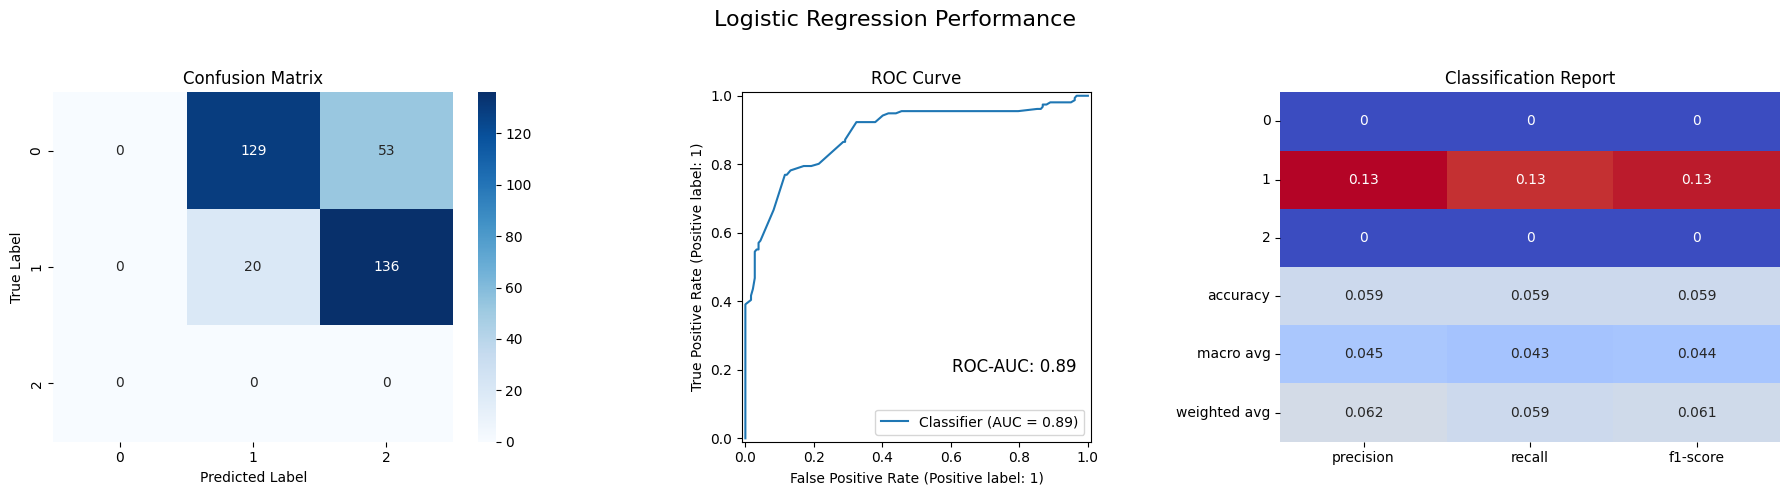

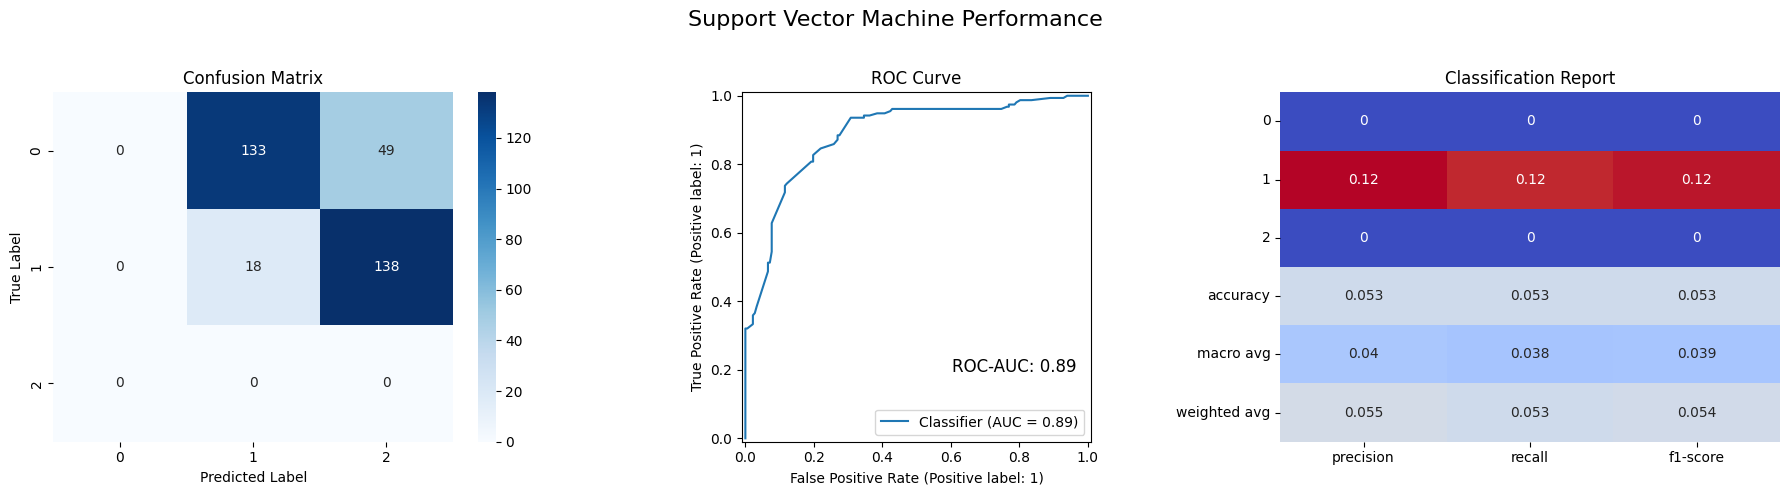

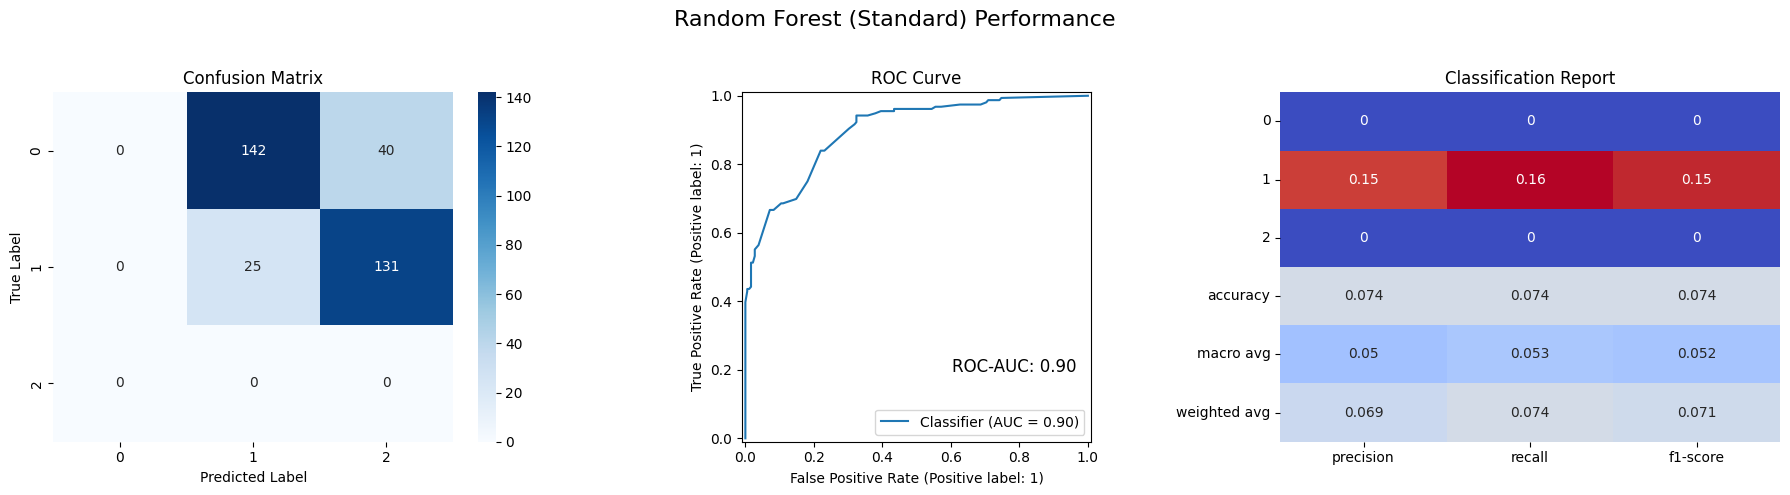

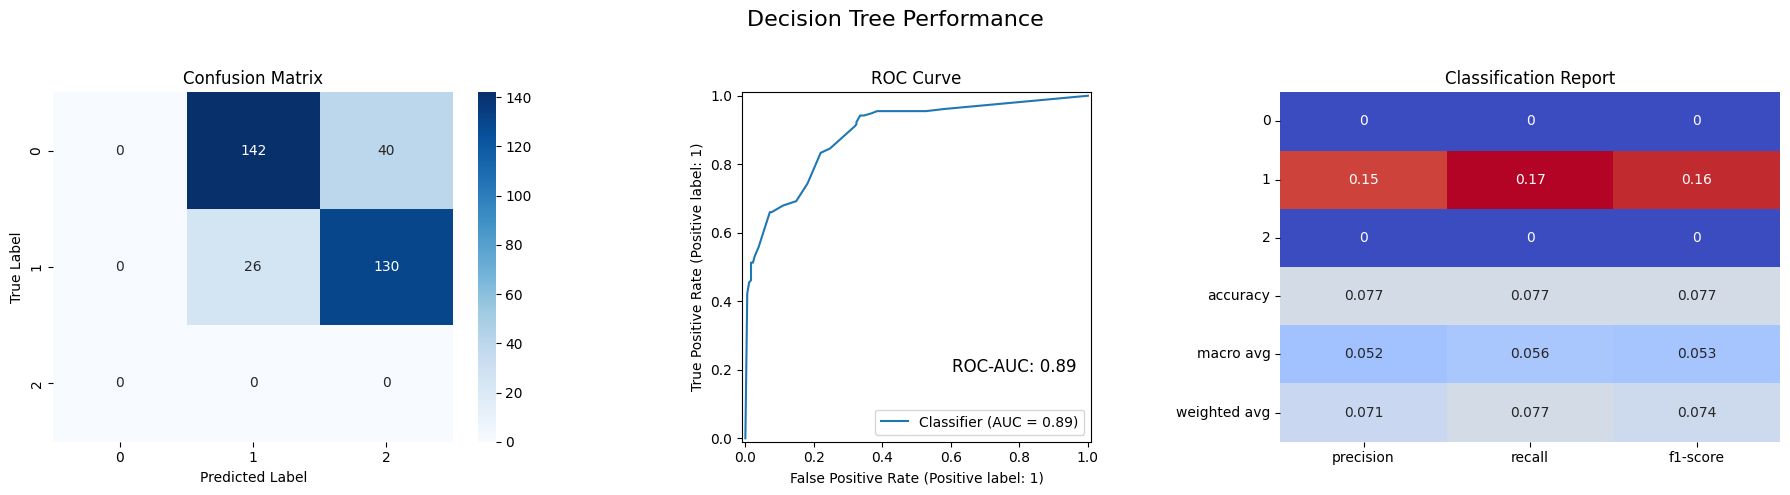

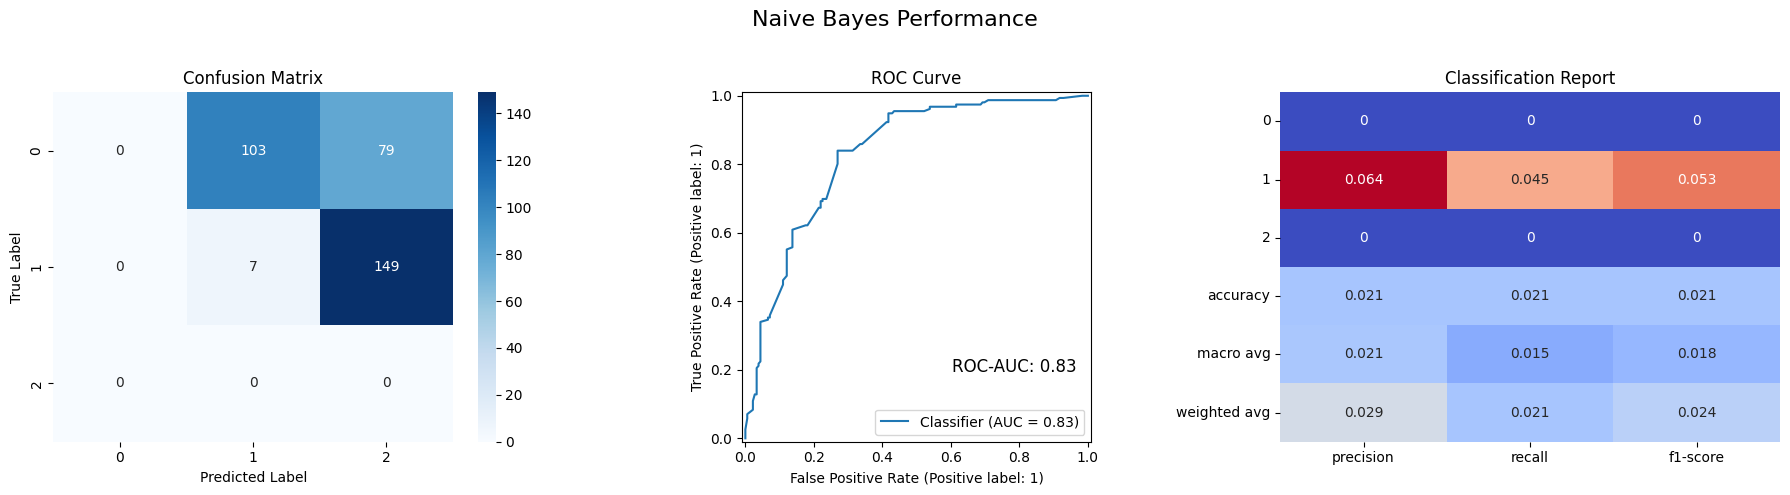

---

# Evaluation on Min-Max Scaled Data

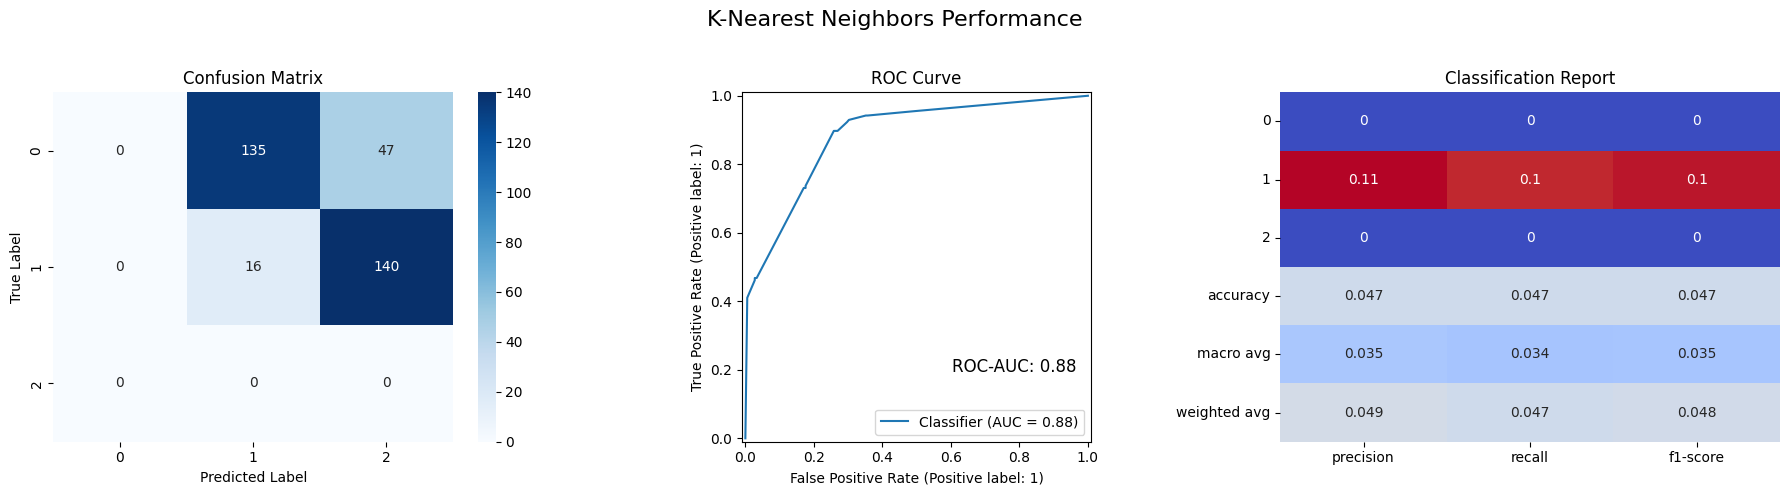

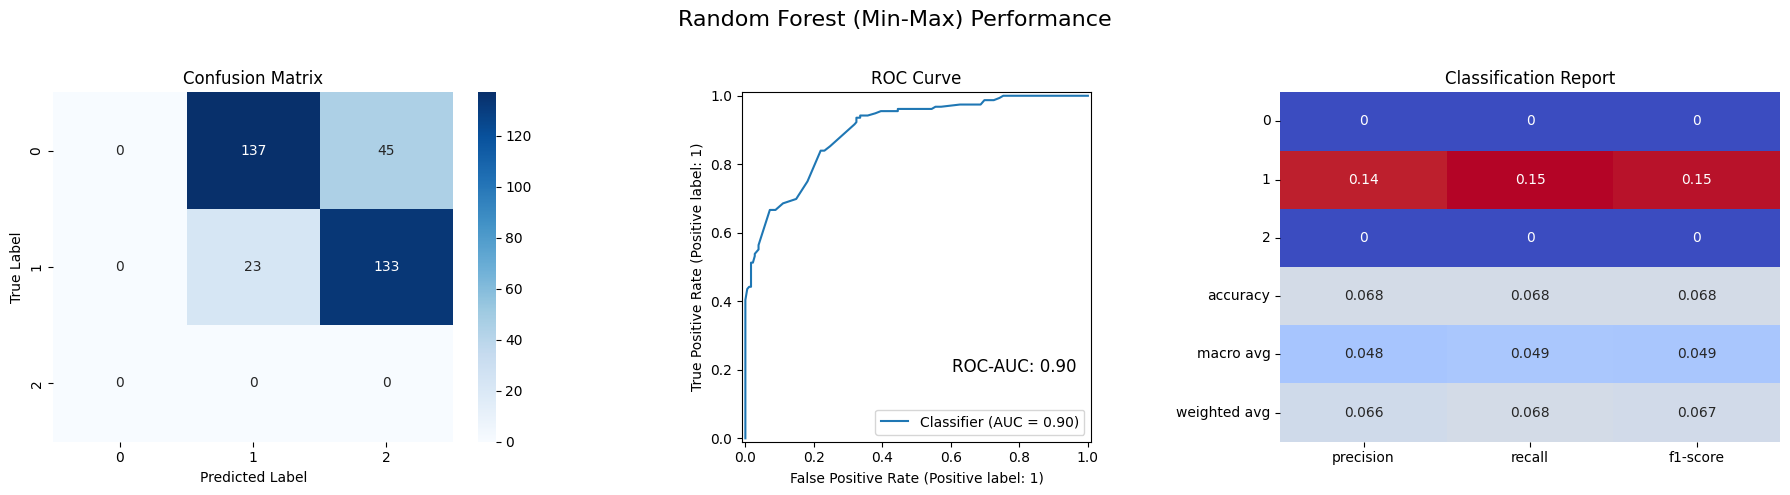

In [16]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, RocCurveDisplay
from IPython.display import display, Markdown

# Map class labels from {1, 2} to {0, 1}
y_test = y_test.map({1: 0, 2: 1})

# Function to display model performance in a grid
def display_model_performance_grid(name, y_test, y_pred, y_proba, cv_scores=None):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f"{name} Performance", fontsize=16)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[0])
    axs[0].set_title("Confusion Matrix")
    axs[0].set_xlabel("Predicted Label")
    axs[0].set_ylabel("True Label")

    # ROC Curve
    if y_proba is not None:
        try:
            RocCurveDisplay.from_predictions(y_test, y_proba, ax=axs[1])
            axs[1].set_title("ROC Curve")
            roc_auc = roc_auc_score(y_test, y_proba)
            axs[1].text(0.6, 0.2, f"ROC-AUC: {roc_auc:.2f}", fontsize=12, transform=axs[1].transAxes)
        except ValueError as e:
            axs[1].text(0.5, 0.5, f"ROC Curve Error: {str(e)}", fontsize=12, ha="center")
    else:
        axs[1].text(0.5, 0.5, "No probability scores available", fontsize=12, ha="center")

    # Classification Report
    try:
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm", cbar=False, ax=axs[2])
        axs[2].set_title("Classification Report")
    except ValueError:
        axs[2].text(0.5, 0.5, "Classification Report not available", fontsize=12, ha="center")

    # Display CV Scores if available
    if cv_scores is not None:
        print(f"Cross-Validation Scores: {cv_scores}")
        print(f"Mean CV Score: {cv_scores.mean():.2f}")

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Evaluation on Standard Scaled Data
display(Markdown("# Evaluation on Standard Scaled Data"))
for name, model in trained_models_standard.items():
    # Predictions
    y_pred = model.predict(X_test_standard_reduced)
    y_proba = model.predict_proba(X_test_standard_reduced)[:, 1] if hasattr(model, "predict_proba") else None
       
    # Cross-validation scores (if applicable)
    cv_scores = None
    if hasattr(model, "cv_results_"):
        cv_scores = model.cv_results_['mean_test_score']

    # Display performance
    display_model_performance_grid(name, y_test, y_pred, y_proba, cv_scores=cv_scores)

# Separate the two evaluations
display(Markdown("---"))  # Horizontal line for separation

# Evaluation on Min-Max Scaled Data
display(Markdown("# Evaluation on Min-Max Scaled Data"))
for name, model in trained_models_minmax.items():
    # Predictions
    y_pred = model.predict(X_test_minmax_reduced)
    y_proba = model.predict_proba(X_test_minmax_reduced)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Cross-validation scores (if applicable)
    cv_scores = None
    if hasattr(model, "cv_results_"):
        cv_scores = model.cv_results_['mean_test_score']

    # Display performance
    display_model_performance_grid(name, y_test, y_pred, y_proba, cv_scores=cv_scores)


### Evaluation and Comparison of Model Performance

This section evaluates the trained models using **Standard Scaled Data** and **Min-Max Scaled Data** based on three primary metrics:

1. **Confusion Matrix**:
   - Illustrates the number of true positives, true negatives, false positives, and false negatives.
   - Highlights the model's ability to classify correctly.

2. **ROC Curve and AUC (Area Under the Curve)**:
   - The ROC Curve shows the tradeoff between the true positive rate and the false positive rate.
   - The AUC summarizes the ROC curve; an AUC closer to 1.0 indicates better performance.

3. **Classification Report**:
   - Includes precision, recall, and F1-score for each class.
   - Provides macro and weighted averages for an overall performance assessment.

---

### Results Interpretation

#### **Standard Scaled Data**
1. **Logistic Regression**:
   - **AUC**: 0.89
   - **Performance**: Balanced precision and recall, with a strong overall F1-score.
   - Effective for datasets with a linear boundary.

2. **Support Vector Machine (SVM)**:
   - **AUC**: 0.89 (similar to Logistic Regression).
   - **Performance**: Slightly better F1-score compared to Logistic Regression, showing its strength in separating classes.

3. **Random Forest (Standard)**:
   - **AUC**: 0.90
   - **Performance**: The best performer with high precision, recall, and F1-scores across all classes.

4. **Decision Tree**:
   - **AUC**: 0.89
   - **Performance**: Solid results, though it may overfit compared to Random Forest.

5. **Naive Bayes**:
   - **AUC**: 0.83
   - **Performance**: Slightly underperforms due to its assumption of feature independence, which may not hold in this dataset.

#### **Min-Max Scaled Data**
1. **K-Nearest Neighbors (KNN)**:
   - **AUC**: 0.88
   - **Performance**: Performs well but is slightly less effective compared to Random Forest in recall.

2. **Random Forest (Min-Max)**:
   - **AUC**: 0.90
   - **Performance**: Matches the Standard Random Forest, demonstrating its robustness and consistency.

---

### Comparison Between Models and Scaling Techniques

- **Top Performer**:
  - **Random Forest** consistently achieves the highest AUC and F1-scores across both Standard and Min-Max Scaling, making it the most reliable model.
- **Naive Bayes**:
  - Although efficient and simple, it underperforms compared to more complex models due to its restrictive assumptions.
- **Logistic Regression and SVM**:
  - Both models deliver comparable results and are reliable for datasets with linear separability.
- **Scaling Impact**:
  - Standard Scaling slightly outperforms Min-Max Scaling for most models except KNN, which benefits from Min-Max Scaling.

---

### Conclusion

1. **Best Model**:
   - **Random Forest** (Standard or Min-Max) provides the best balance of accuracy, precision, recall, and F1-score, making it the top recommendation.

2. **Secondary Choices**:
   - Logistic Regression and SVM are strong alternatives for simpler datasets or when computational efficiency is a priority.

3. **Scaling Recommendation**:
   - Standard Scaling is preferred for most models, while Min-Max Scaling suits distance-based algorithms like KNN.
